## Exercice 1

L'idée était de vous faire mettre en forme un jeu de données vous-même, avant d'effectuer une ACP. En effet l'ACP directe n'est pas possible car il y a trop de lignes incomplètes, des colonnes a priori peu pertinentes, et des données de type séries temporelles (que l'on ramènera à une seule valeur).

In [1]:
# Import du jeu de données brut
data_orig <- read.csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [2]:
# Affichage d'un aperçu du jeu de données ; fonctions head() et summary() = bons réflexes :)
data <- data_orig
dim(data)
head(data)

[1] 344917     67

iso_code continent location    date       total_cases new_cases
1 AFG      Asia      Afghanistan 2020-01-03 NA          0        
2 AFG      Asia      Afghanistan 2020-01-04 NA          0        
3 AFG      Asia      Afghanistan 2020-01-05 NA          0        
4 AFG      Asia      Afghanistan 2020-01-06 NA          0        
5 AFG      Asia      Afghanistan 2020-01-07 NA          0        
6 AFG      Asia      Afghanistan 2020-01-08 NA          0        
  new_cases_smoothed total_deaths new_deaths new_deaths_smoothed ⋯ male_smokers
1 NA                 NA           0          NA                  ⋯ NA          
2 NA                 NA           0          NA                  ⋯ NA          
3 NA                 NA           0          NA                  ⋯ NA          
4 NA                 NA           0          NA                  ⋯ NA          
5 NA                 NA           0          NA                  ⋯ NA          
6  0                 NA           0           0                  ⋯ NA          
  handwashing_facilities hospital_beds_per_thousand life_expectancy
1 37.746                 0.5                        64.83          
2 37.746                 0.5                        64.83          
3 37.746                 0.5                        64.83          
4 37.746                 0.5                        64.83          
5 37.746                 0.5                        64.83          
6 37.746                 0.5                        64.83          
  human_development_index population excess_mortality_cumulative_absolute
1 0.511                   41128772   NA                                  
2 0.511                   41128772   NA                                  
3 0.511                   41128772   NA                                  
4 0.511                   41128772   NA                                  
5 0.511                   41128772   NA                                  
6 0.511                   41128772   NA                                  
  excess_mortality_cumulative excess_mortality
1 NA                          NA              
2 NA                          NA              
3 NA                          NA              
4 NA                          NA              
5 NA                          NA              
6 NA                          NA              
  excess_mortality_cumulative_per_million
1 NA                                     
2 NA                                     
3 NA                                     
4 NA                                     
5 NA                                     
6 NA

In [3]:
# On se limite pour l'instant à des statistiques globales prises à un jour fixé :
dmax <- '2021-12-31' #max(data$date)
data <- data[data$date == dmax,] #filtre sur les lignes, donc *avant* la virgule
dim(data)
summary(data)

[1] 254  67

   iso_code          continent           location             date          
 Length:254         Length:254         Length:254         Length:254        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  total_cases          new_cases       new_cases_smoothed   total_deaths    
 Min.   :        1   Min.   :      0   Min.   :      0.0   Min.   :      1  
 1st Qu.:    18326   1st Qu.:      0   1st Qu.:     37.0   1st Qu.:    281  
 Median :   148839   Median :    295   Median :    296.8   Median :   2468  
 Mean   :  5085552   Mean   :  22919   Mean   :  19680.6   Mean   : 101373  

In [4]:
# Le jeu de données comprend quelques "lignes résumé" (continents, catégories de revenus...).
# En observant un peu, on remarque que leur code ISO démarre par "OWID_" :
owid_lines <- startsWith(data$iso_code, "OWID_")
data[owid_lines,]

iso_code continent location            date       total_cases new_cases
2093   OWID_AFR           Africa              2021-12-31   9850360     58952  
17104  OWID_ASI           Asia                2021-12-31  84647174    114105  
87984  OWID_ENG Europe    England             2021-12-31        NA        NA  
96168  OWID_EUR           Europe              2021-12-31  86422548    565941  
97538  OWID_EUN           European Union      2021-12-31  53608595    241084  
131649 OWID_HIC           High income         2021-12-31 134132754   1084099  
158897 OWID_KOS Europe    Kosovo              2021-12-31    161399        53  
173907 OWID_LIC           Low income          2021-12-31   1805520     23632  
175271 OWID_LMC           Lower middle income 2021-12-31  65603392     70197  
221102 OWID_NAM           North America       2021-12-31  64102325    542800  
224823 OWID_CYN Asia      Northern Cyprus     2021-12-31        NA        NA  
225824 OWID_NIR Europe    Northern Ireland    2021-12-31        NA        NA  
229914 OWID_OCE           Oceania             2021-12-31    548908       670  
270779 OWID_SCT Europe    Scotland            2021-12-31        NA        NA  
287145 OWID_SAM           South America       2021-12-31  39873056     67361  
328061 OWID_UMC           Upper middle income 2021-12-31  83617794    169473  
337532 OWID_WLS Europe    Wales               2021-12-31        NA        NA  
340184 OWID_WRL           World               2021-12-31 285446097   1349829  
       new_cases_smoothed total_deaths new_deaths new_deaths_smoothed ⋯
2093     44044.714         228878       295        211.571            ⋯
17104    85279.143        1256618      1055       1107.429            ⋯
87984           NA             NA        NA             NA            ⋯
96168   569201.000        1566172      2308       3111.857            ⋯
97538   351451.000         915208      1139       1654.286            ⋯
131649  912211.429        2042081      3297       3470.714            ⋯
158897      20.571           2980         0          0.143            ⋯
173907   16829.571          42106        38         47.714            ⋯
175271   55666.714        1187053       831       1072.143            ⋯
221102  357089.571        1224887      2012       1750.286            ⋯
224823          NA             NA        NA             NA            ⋯
225824          NA             NA        NA             NA            ⋯
229914   14575.286           4989        14         13.714            ⋯
270779          NA             NA        NA             NA            ⋯
287145   52751.429        1192550       281        286.857            ⋯
328061  136426.714        2200159      1793       1887.857            ⋯
337532          NA             NA        NA             NA            ⋯
340184 1122946.000        5474098      5965       6481.714            ⋯
       male_smokers handwashing_facilities hospital_beds_per_thousand
2093       NA          NA                     NA                     
17104      NA          NA                     NA                     
87984      NA          NA                     NA                     
96168      NA          NA                     NA                     
97538      NA          NA                     NA                     
131649     NA          NA                     NA                     
158897     NA          NA                     NA                     
173907     NA          NA                     NA                     
175271     NA          NA                     NA                     
221102     NA          NA                     NA                     
224823     NA          NA                     NA                     
225824     NA          NA                     NA                     
229914     NA          NA                     NA                     
270779     NA          NA                     NA                     
287145     NA          NA                     NA                     
328061     NA     

In [5]:
# Toutes ces lignes spéciales sont a priori à supprimer, soit car elles correspondent à des aggrégations à retrouver plus tard,
# soit car elles concernent des pays avec très peu de données, à l'exception semble-t-il du Kosovo. Gardons seulement cette ligne.
kosovo_index <- data$iso_code == "OWID_KOS"
kosovo_line <- data[kosovo_index,]
kosovo_line[1] <- "KOS"
data <- rbind(data[!owid_lines,], kosovo_line)

In [6]:
# Pour supprimer les lignes avec valeurs manquantes, il y a plusieurs options.
# J'en indique ici 3, de la plus complexe à la plus simple :
data1 <- data[apply(data, 1, function(row) all(!is.na(row))),] #méthode 1
data2 <- data[complete.cases(data),]                           #méthode 2
data3 <- na.omit(data)                                         #méthode 3

In [7]:
# On remarque alors qu'il n'y a plus aucune ligne ==> il faut restreindre les colonnes
# (ou "deviner" les valeurs manquantes d'une manière ou d'une autre : voir le package missMDA)
# (ici on se contente de la version simple : pas de données manquantes en entrée).
nrow(data3)

[1] 0

In [8]:
# Que représentent les variables ?
colnames(data)

[1] "iso_code"                                  
 [2] "continent"                                 
 [3] "location"                                  
 [4] "date"                                      
 [5] "total_cases"                               
 [6] "new_cases"                                 
 [7] "new_cases_smoothed"                        
 [8] "total_deaths"                              
 [9] "new_deaths"                                
[10] "new_deaths_smoothed"                       
[11] "total_cases_per_million"                   
[12] "new_cases_per_million"                     
[13] "new_cases_smoothed_per_million"            
[14] "total_deaths_per_million"                  
[15] "new_deaths_per_million"                    
[16] "new_deaths_smoothed_per_million"           
[17] "reproduction_rate"                         
[18] "icu_patients"                              
[19] "icu_patients_per_million"                  
[20] "hosp_patients"                             
[21] "hosp_patients_per_million"                 
[22] "weekly_icu_admissions"                     
[23] "weekly_icu_admissions_per_million"         
[24] "weekly_hosp_admissions"                    
[25] "weekly_hosp_admissions_per_million"        
[26] "total_tests"                               
[27] "new_tests"                                 
[28] "total_tests_per_thousand"                  
[29] "new_tests_per_thousand"                    
[30] "new_tests_smoothed"                        
[31] "new_tests_smoothed_per_thousand"           
[32] "positive_rate"                             
[33] "tests_per_case"                            
[34] "tests_units"                               
[35] "total_vaccinations"                        
[36] "people_vaccinated"                         
[37] "people_fully_vaccinated"                   
[38] "total_boosters"                            
[39] "new_vaccinations"                          
[40] "new_vaccinations_smoothed"                 
[41] "total_vaccinations_per_hundred"            
[42] "people_vaccinated_per_hundred"             
[43] "people_fully_vaccinated_per_hundred"       
[44] "total_boosters_per_hundred"                
[45] "new_vaccinations_smoothed_per_million"     
[46] "new_people_vaccinated_smoothed"            
[47] "new_people_vaccinated_smoothed_per_hundred"
[48] "stringency_index"                          
[49] "population_density"                        
[50] "median_age"                                
[51] "aged_65_older"                             
[52] "aged_70_older"                             
[53] "gdp_per_capita"                            
[54] "extreme_poverty"                           
[55] "cardiovasc_death_rate"                     
[56] "diabetes_prevalence"                       
[57] "female_smokers"                            
[58] "male_smokers"                              
[59] "handwashing_facilities"                    
[60] "hospital_beds_per_thousand"                
[61] "life_expectancy"                           
[62] "human_development_index"                   
[63] "population"                                
[64] "excess_mortality_cumulative_absolute"      
[65] "excess_mortality_cumulative"               
[66] "excess_mortality"                          
[67] "excess_mortality_cumulative_per_million"

In [9]:
# Variables "new_*" : instantané journalier d'un certain indicateur. On ne s'y intéressera pas ici (cf. plus bas).
# De même pour les variables "weekly_*" (indicateurs hebdomadaires, j'imagine). Reste :
selection <- colnames(data)[!startsWith(colnames(data), "new_") & !startsWith(colnames(data), "weekly_")]

In [10]:
# Colonnes avec +50% de valeurs renseignées
selection <- selection[ apply(data[,selection], 2, function(col) sum(!is.na(col)) > nrow(data)/2) ]
selection

[1] "iso_code"                   "continent"                 
 [3] "location"                   "date"                      
 [5] "total_cases"                "total_deaths"              
 [7] "total_cases_per_million"    "total_deaths_per_million"  
 [9] "reproduction_rate"          "positive_rate"             
[11] "tests_per_case"             "tests_units"               
[13] "stringency_index"           "population_density"        
[15] "median_age"                 "aged_65_older"             
[17] "aged_70_older"              "gdp_per_capita"            
[19] "extreme_poverty"            "cardiovasc_death_rate"     
[21] "diabetes_prevalence"        "female_smokers"            
[23] "male_smokers"               "hospital_beds_per_thousand"
[25] "life_expectancy"            "human_development_index"   
[27] "population"

On y voit enfin plus clair :

- iso_code : identifiant d'un pays, sur 3 lettres
- location : nom du pays
- continent, date : heu, continent, et date =)
- total_cases : nombre total de cas enregistrés jusqu'à dmax
- total_deaths : nombre total de décès enregistrés jusqu'à dmax
- total_cases_per_million : nombre relatif de cas totaux (par million)
- total_deaths_per_million : nombre relatif de décès (par million)
- tests_units : "Units used by the location to report its testing data" https://github.com/owid/covid-19-data/blob/master/public/data/README.md <br> en fait cette colonne ne contient que ". " ==> inutilisable.
- population : nombre d'habitants
- population_density : densité de population (par kilomètre carré)
- median_age : âge médian, 50% des gens sont plus jeunes et 50% plus vieux
- aged_65_older : pourcentage de personnes dépassant 65 ans
- aged_70_older : pareil avec 70 ans
- gdp_per_capita : PIB par habitant
- extreme_poverty : pourcentage de la population sous le seuil d'extrême pauvreté
- cardiovasc_death_rate : "Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)"
- diabetes_prevalence : Diabetes prevalence (% of population aged 20 to 79) in 2017
- female_smokers : pourcentage de fumeuses
- male_smokers : pourcentage de fumeurs
- hospital_beds_per_thousand : nombre de lits d'hôpital par tranche de 1000 habitants
- life_expectancy : espérance de vie
- human_development_index : indice de développement humain

In [11]:
data$tests_units #???

[1] ""                "tests performed" ""                ""               
  [5] "tests performed" ""                ""                ""               
  [9] "tests performed" "tests performed" ""                "tests performed"
 [13] "tests performed" "tests performed" "tests performed" "units unclear"  
 [17] "tests performed" ""                "tests performed" "tests performed"
 [21] "tests performed" ""                ""                "samples tested" 
 [25] "tests performed" ""                "tests performed" "tests performed"
 [29] "tests performed" ""                ""                "tests performed"
 [33] ""                ""                "tests performed" ""               
 [37] "tests performed" "tests performed" ""                ""               
 [41] ""                "tests performed" "tests performed" "tests performed"
 [45] ""                ""                ""                "people tested"  
 [49] "tests performed" "people tested"   ""                "tests performed"
 [53] "tests performed" "tests performed" ""                "tests performed"
 [57] ""                ""                "samples tested"  "people tested"  
 [61] ""                "tests performed" "tests performed" ""               
 [65] "tests performed" ""                "tests performed" "people tested"  
 [69] ""                "tests performed" "tests performed" "people tested"  
 [73] ""                ""                "tests performed" "tests performed"
 [77] "tests performed" "tests performed" "tests performed" ""               
 [81] "samples tested"  ""                ""                ""               
 [85] "tests performed" "people tested"   ""                ""               
 [89] ""                "tests performed" ""                ""               
 [93] "tests performed" "tests performed" "tests performed" "samples tested" 
 [97] "people tested"   "tests performed" "tests performed" "tests performed"
[101] ""                "people tested"   "tests performed" "samples tested" 
[105] "people tested"   ""                "tests performed" ""               
[109] "tests performed" ""                "tests performed" ""               
[113] "tests performed" "tests performed" ""                ""               
[117] ""                "samples tested"  "tests performed" "tests performed"
[121] "tests performed" ""                "tests performed" "tests performed"
[125] "people tested"   "samples tested"  ""                "tests performed"
[129] ""                ""                "tests performed" ""               
[133] ""                "people tested"   ""                "tests performed"
[137] ""                "samples tested"  ""                ""               
[141] "people tested"   "tests performed" "samples tested"  "tests performed"
[145] ""                "samples tested"  "tests performed" ""               
[149] "tests performed" ""                ""                "tests performed"
[153] ""                "samples tested"  "tests performed" ""               
[157] "people tested"   ""                "tests performed" ""               
[161] "tests performed" "tests performed" ""                "tests performed"
[165] "tests performed" "people tested"   ""                "tests performed"
[169] "tests performed" "tests performed" "tests performed" ""               
[173] "tests performed" "tests performed" "samples tested"  ""               
[177] ""                "people tested"   ""                ""               
[181] ""                "tests performed" ""                ""               
[185] ""                "tests performed" "tests performed" "people tested"  
[189] ""                ""                ""                ""               
[193] "tests performed" "tests performed" ""                ""               
[197] "people tested"   "people tested"   "tests performed" "tests performed"
[201] "tests performed" ""                "tests performed" "tests performed"
[205] "tests performed" 

In [12]:
selection <- selection[selection != "tests_units"]
newData <- na.omit(data[,selection])
nrow(newData)

[1] 72

92 lignes est raisonnable (proche de 50% de la taille du jeu de données initial).
Cependant, pour être cohérent il faut en plus choisir un type de variable : absolu, ou relatif ? Je préfère les indicateurs relatifs (\*\_per\_million, \*\_density) :

In [13]:
selection <- selection[!selection %in% c("total_cases", "total_deaths", "population")]
newData <- na.omit(data[,selection])
nrow(newData) #92 encore

[1] 72

In [14]:
rownames(newData) <- newData$iso_code #pour l'affichage des individus
newData <- newData[,-c(1,4)] #suppression des colonnes "code ISO" et "date", désormais inutiles

**Note :** toute l'analyse jusqu'ici aurait pu se faire aussi facilement avec un autre langage, Python par exemple. <br>
À partir d'ici cependant, le package R FactoMineR est très pratique (pas d'équivalent Python (?!))

In [15]:
# ...On est enfin prêt pour l'ACP !
library(FactoMineR)
res.pca <- PCA(newData, quali.sup=1:2, ncp=6, graph=FALSE)

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


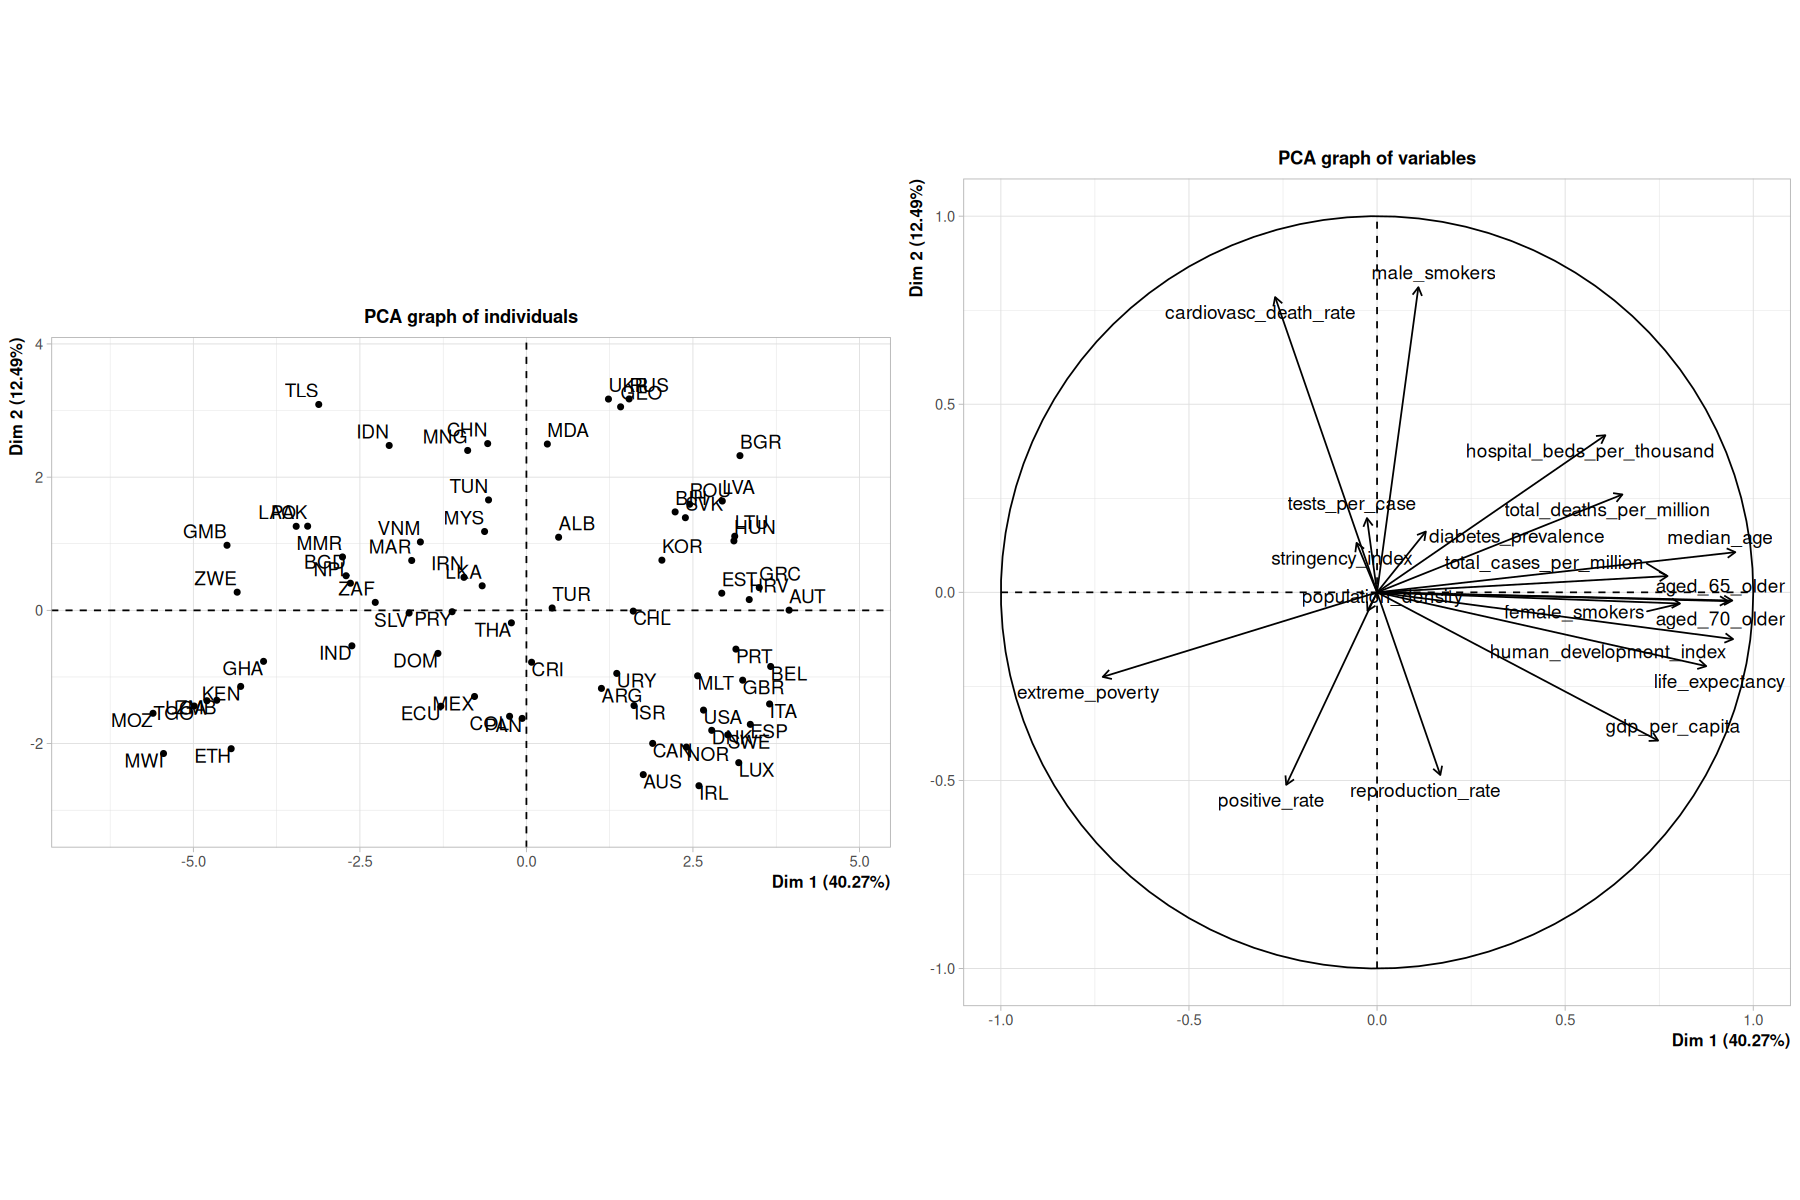

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
plotInd <- plot(res.pca, choix="ind", invisible="quali")
plotVar <- plot(res.pca, choix="var")
library(gridExtra)
grid.arrange(plotInd, plotVar, ncol=2)

Bon, il semble qu'aucun individu ne se détache. En fait certaines lignes ont presque toutes leurs valeurs renseignées, et une fois complétées à l'aide de Google on trouve des individus extrêmes (Monaco, Singapour). EDIT : ici je n'ai pas complété le fichier - vous pouvez le faire.

In [17]:
extremes <- which(data$location %in% c("Monaco", "Singapore"))
data[extremes,selection]

iso_code continent location  date       total_cases_per_million
197910 MCO      Europe    Monaco    2021-12-31 138280.67              
277597 SGP      Asia      Singapore 2021-12-31  49566.07              
       total_deaths_per_million reproduction_rate positive_rate tests_per_case
197910 1041.353                 0.93              NA            NA            
277597  146.886                 1.14              NA            NA            
       stringency_index ⋯ aged_70_older gdp_per_capita extreme_poverty
197910 34.13            ⋯    NA               NA       NA             
277597 42.77            ⋯ 7.049         85535.38       NA             
       cardiovasc_death_rate diabetes_prevalence female_smokers male_smokers
197910     NA                 5.46                NA              NA        
277597 92.243                10.99               5.2            28.3        
       hospital_beds_per_thousand life_expectancy human_development_index
197910 13.8                       86.75              NA                  
277597  2.4                       83.62           0.938

Côté variables, aged_65_older et aged_70_older apparaissent très corrélées (en fait même confondues). C'est logique, on gardera donc seulement aged_70_older après vérification numérique :

In [18]:
cor(newData[,c("aged_65_older", "aged_70_older")])

aged_65_older aged_70_older
aged_65_older 1.0000000     0.9939191    
aged_70_older 0.9939191     1.0000000

In [19]:
newData <- subset(newData, select=-aged_65_older)

In [20]:
res.pca <- PCA(newData, quali.sup=1:2, ncp=6, graph=FALSE)

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


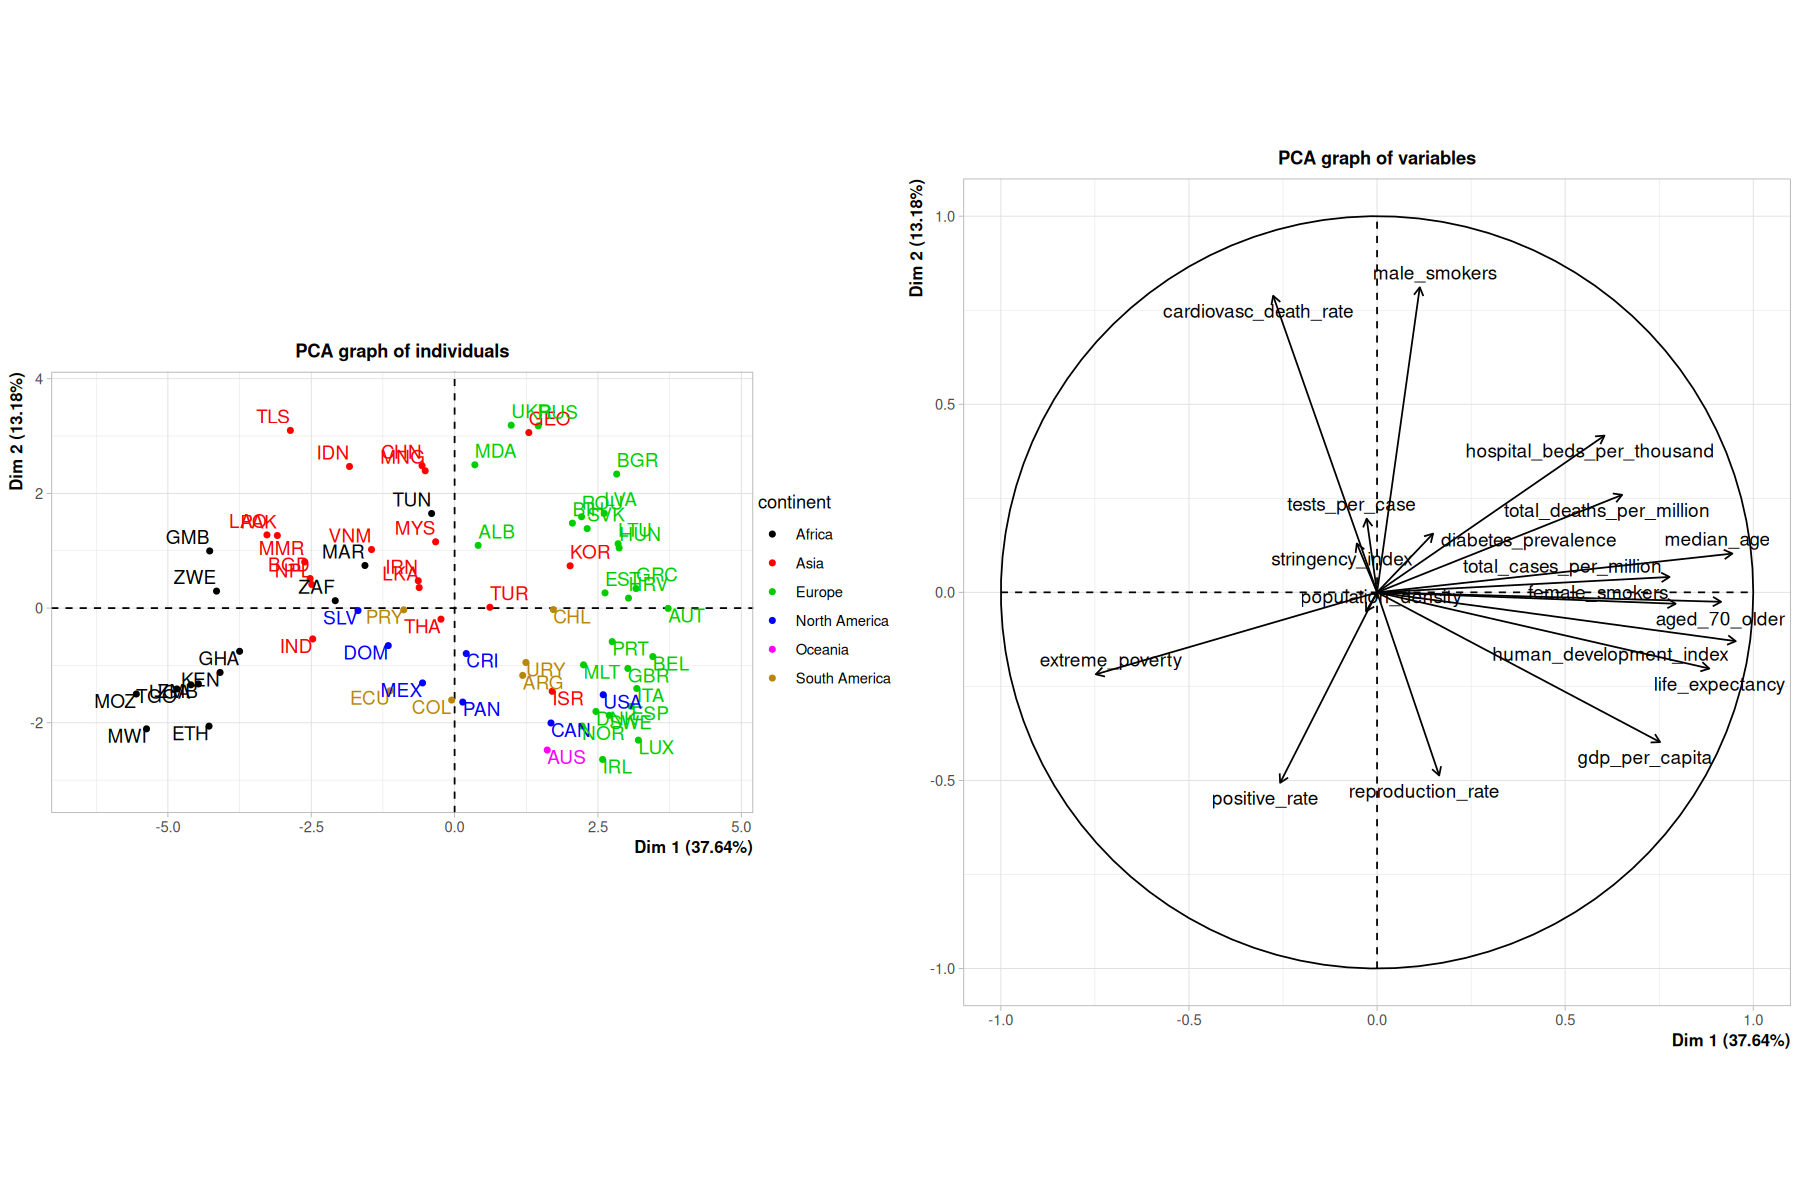

In [21]:
plotInd <- plot(res.pca, choix="ind", invisible="quali", habillage=1)
plotVar <- plot(res.pca, choix="var")
library(gridExtra)
grid.arrange(plotInd, plotVar, ncol=2)

Environ 65% de l'inertie expliquée dans ce premier plan ACP (51 + 14). Le cercle des corrélations oppose logiquement "richesse" à droite (HDI, PIB/hab), avec "pauvreté" à gauche. Sur le nuage des individus cela correspond grossièrement à l'opposition Europe occidentale / Afrique (quelques exceptions : Tunisie, Seychelles, ...).

Il est intéressant de constater que les indicateurs de richesse sont très corrélés positivement au nombre de morts par millions, lui-même anti-corrélé avec extreme_poverty : le COVID frapperait plutôt les riches ? Mais pourquoi donc, puisque le virus est partout ? Et bien un élément de réponse se trouve dans ce même plan ACP : aged_70_older => on y vit plus vieux, et dans une moindre mesure diabetes_prevalence => plus de cas de diabète (à vérifier numériquement).

In [22]:
cor(newData[,c("aged_70_older", "total_deaths_per_million", "human_development_index",
               "diabetes_prevalence", "extreme_poverty")])

aged_70_older total_deaths_per_million
aged_70_older             1.00000000    0.6116174              
total_deaths_per_million  0.61161735    1.0000000              
human_development_index   0.82030920    0.5002665              
diabetes_prevalence      -0.02528401    0.1461730              
extreme_poverty          -0.55416536   -0.4433506              
                         human_development_index diabetes_prevalence
aged_70_older             0.8203092              -0.02528401        
total_deaths_per_million  0.5002665               0.14617300        
human_development_index   1.0000000               0.17607414        
diabetes_prevalence       0.1760741               1.00000000        
extreme_poverty          -0.7396914              -0.34625674        
                         extreme_poverty
aged_70_older            -0.5541654     
total_deaths_per_million -0.4433506     
human_development_index  -0.7396914     
diabetes_prevalence      -0.3462567     
extreme_poverty           1.0000000

In [23]:
newData

continent     location               total_cases_per_million
ALB Europe        Albania                 73495.999             
ARG South America Argentina              127015.620             
AUS Oceania       Australia               14004.709             
AUT Europe        Austria                141452.257             
BGD Asia          Bangladesh               9262.063             
BEL Europe        Belgium                179883.824             
BIH Europe        Bosnia and Herzegovina  89830.928             
BGR Europe        Bulgaria               108210.980             
CAN North America Canada                  54674.470             
CHL South America Chile                   92058.065             
CHN Asia          China                      92.624             
COL South America Colombia                99059.263             
CRI North America Costa Rica             110206.152             
HRV Europe        Croatia                176082.986             
DNK Europe        Denmark                133231.468             
DOM North America Dominican Republic      37160.446             
ECU South America Ecuador                 30320.534             
SLV North America El Salvador             19212.981             
EST Europe        Estonia                171039.256             
ETH Africa        Ethiopia                 3367.185             
GMB Africa        Gambia                   3758.322             
GEO Asia          Georgia                249638.058             
GHA Africa        Ghana                    4364.905             
GRC Europe        Greece                 104473.849             
HUN Europe        Hungary                126053.645             
IND Asia          India                   24583.308             
IDN Asia          Indonesia               15472.592             
IRN Asia          Iran                    69934.029             
IRL Europe        Ireland                149793.912             
ISR Asia          Israel                 146252.196             
⋮   ⋮             ⋮                      ⋮                      
MAR Africa        Morocco                 25656.966             
MOZ Africa        Mozambique               5587.555             
MMR Asia          Myanmar                  9797.725             
NPL Asia          Nepal                   27119.361             
NOR Europe        Norway                  72669.388             
PAK Asia          Pakistan                 5490.774             
PAN North America Panama                 111383.433             
PRY South America Paraguay                68738.907             
PRT Europe        Portugal               124888.605             
ROU Europe        Romania                 91927.269             
RUS Europe        Russia                  72557.126             
SVK Europe        Slovakia               149152.071             
ZAF Africa        South Africa            57543.972             
KOR Asia          South Korea             12259.772             
ESP Europe        Spain                  128265.632             
LKA Asia          Sri Lanka               26898.175             
SWE Europe        Sweden                 125711.264             
THA Asia          Thailand                31011.538             
TLS Asia          Timor                   14789.405             
TGO Africa        Togo                     3408.749             
TUN Africa        Tunisia                 58743.540             
TUR Asia          Turkey                 110635.410             
UGA Africa        Uganda                   3019.518             
UKR Europe        Ukraine                 90829.360             
GBR Europe        United Kingdom         199109.996             
USA North America United States          158249.753             
URY South America Uruguay                119875.973             
VNM Asia          Vietnam                 17632.268             
ZMB Africa        Zambia                  12448.652             
ZWE Africa        Zimbabwe             

La corrélation (resp. anti-corrélation) aged_70_older avec HDI (resp. extreme_poverty) et total_deaths est vérifiée. De même, on observe une légère corrélation positive (resp. négative) entre diabetes_prevalence et HDI (resp. extreme_poverty).

Ensuite, le taux de fumeuses semble très corrélé à l'âge médian : les femmes auraient plus tendance à fumer dans les pays où l'on vit plus vieux (donc en général plus riches). Ce n'est pas le cas de male_smokers : le taux de fumeurs n'indique quant à lui pas grand chose. De même, et plus étonnament, le taux de mortalité par maladies cardiovasculaires (infarctus j'imagine) ne paraît corrélé à rien - si ce n'est justement et assez logiquement, la proportion de fumeurs : "According to the American Heart Association, cardiovascular disease accounts for about 800,000 U.S. deaths every year,5 making it the leading cause of all deaths in the United States. Of those, nearly 20 percent are due to cigarette smoking." [https://www.fda.gov/tobacco-products/health-effects-tobacco-use/how-smoking-affects-heart-health#]

La coloration par continents montre une opposition haut/bas entre Europe de l'est et Europe de l'ouest + USA/Canada/Israel/Corée/Australie. Il semble y avoir relativement plus de fumeurs en Géorgie/Ukraine/Russie. les pays d'Amérique centrale et du sud sont plus bas, donc a priori moins touchés par les décès par infarctus et comportant moins de fumeurs. Il n'y a pas assez de pays d'Océanie pour en dire grand chose, et l'Asie est répartie un peu partout, montrant une grande inhomogénéité en comparaison aux autres continents.

Vérifions notre analyse en regardant de plus près quelques individus :

In [24]:
indivs_indices <- rownames(newData) %in% c("LUX", "UKR", "NER", "ECU")
newData[indivs_indices,c("location", "total_deaths_per_million", "aged_70_older", "male_smokers",
                         "cardiovasc_death_rate", "human_development_index")]

location   total_deaths_per_million aged_70_older male_smokers
ECU Ecuador    1870.396                  4.458        12.3        
LUX Luxembourg  980.542                  9.842        26.0        
UKR Ukraine    2330.704                 11.133        47.4        
    cardiovasc_death_rate human_development_index
ECU 140.448               0.759                  
LUX 128.275               0.916                  
UKR 539.849               0.779

Luxembourg : population âgée, HDI élevé, 2x moins de fumeurs qu'en Ukraine mais 2x + qu'en Equateur. <br>
Niger : population jeune, HDI bas, peu de fumeurs, très peu de morts du COVID.

Bref, passons au second plan ACP :

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


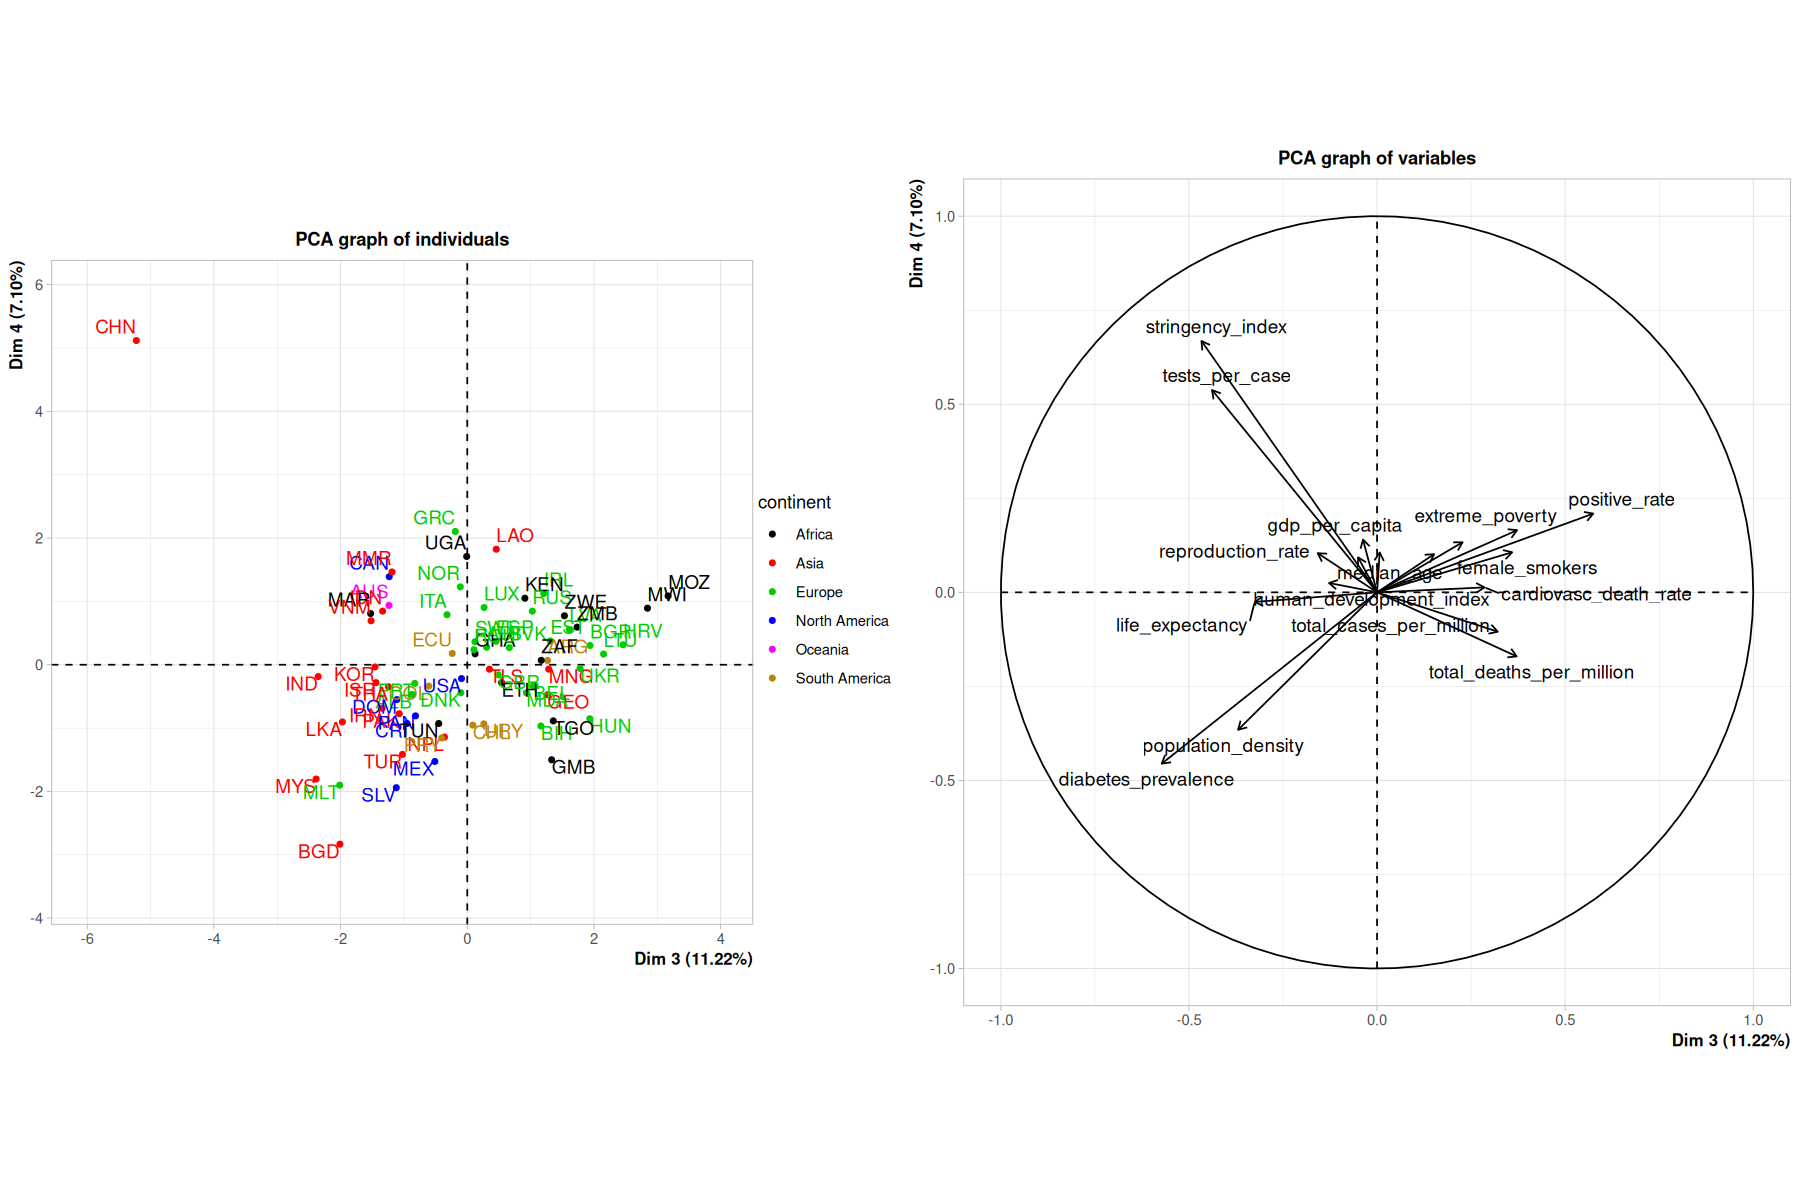

In [25]:
plotInd <- plot(res.pca, choix="ind", invisible="quali", habillage=1, axes=3:4)
plotVar <- plot(res.pca, choix="var", axes=3:4)
library(gridExtra)
grid.arrange(plotInd, plotVar, ncol=2)

Peu d'inertie expliquée dans ce plan (à peine plus de 17%), mais une observation intéressante : anti-corrélation population_density et total_deaths_per_million ? À vérifier numériquement bien sûr car cette dernière flèche est loin du bord. Ce serait cependant cohérent : densément peuplé => contaminations plus faciles => plus de cas => plus de personnes très fragiles touchées => plus de morts.

On note aussi l'anti-corrélation entre diabetes_prevalence et extreme_poverty, déjà un peu observée dans le premier plan. Vérification numérique :

In [26]:
indivs_indices <- rownames(newData) %in% c("MLT", "EGY", "MNE", "MWI")
newData[indivs_indices,c("location", "total_deaths_per_million", "population_density",
                         "diabetes_prevalence", "extreme_poverty")]

location total_deaths_per_million population_density diabetes_prevalence
MWI Malawi   115.411                   197.519           3.94               
MLT Malta    924.445                  1454.037           8.83               
    extreme_poverty
MWI 71.4           
MLT  0.2

Opposition Égypte / Malawi vérifiée sur l'axe diabète/pauvreté, ainsi que Malte/Montenegro sur l'axe morts_par_million/densité.